In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/', force_remount=True)

!ls "/content/drive/My Drive/msc_project/RNN_model/"
import os
os.chdir("/content/drive/My Drive/msc_project/RNN_model/")

Mounted at /content/drive/
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
input_x_test2.mat  model	  model_plot.py  output       RNN_model.ipynb
input_x_test.mat   model_load.py  newout	 __pycache__  train


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 96, 16)            80        
_________________________________________________________________
bidirectional_9 (Bidirection (None, 96, 128)           31104     
_________________________________________________________________
dropout_13 (Dropout)         (None, 96, 128)           0         
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 256)               197376    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
__________

W0816 23:53:16.683362 140256631289728 legend.py:1289] No handles with labels found to put in legend.


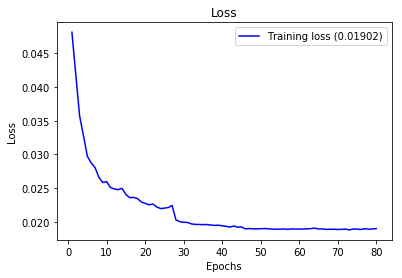

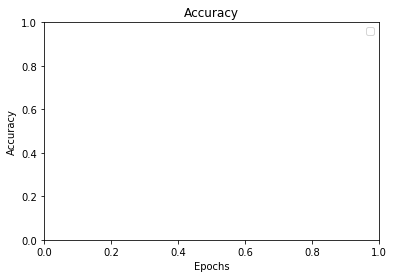

426500/426500 [==============================] - 80s 189us/step


In [0]:
from keras import Sequential, optimizers
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten,GRU, Bidirectional, LSTM
import scipy.io as sio
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import model_plot as pt

# this model is for fridge
# read data from matlab
#------------train-------------
x='./train/input_x_fridge.mat'
y='./train/input_y_fridge.mat'
x_input=sio.loadmat(x)
y_input=sio.loadmat(y)
x_train = x_input.get('input_x_fridge')
y_train = y_input.get('input_y_fridge')
x_train = np.transpose(x_train)
x_train = x_train[:,:,np.newaxis]
y_train = np.transpose(y_train)


# model stack
model = Sequential()
model.add(Conv1D(16, kernel_size=4, activation='relu', input_shape=(99,1), name='conv1'))
# Bi-directional GRUs
model.add(Bidirectional(GRU(64, activation='relu', return_sequences=True), merge_mode='concat'))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(128, activation='relu', return_sequences=False), merge_mode='concat'))
model.add(Dropout(0.5))
# Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# model complie
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.summary()


# random the dataset
index = [i for i in range(len(x_train))]
random.shuffle(index)
x_train = x_train[index]
y_train = y_train[index]
x_train = x_train[0:int(0.1*len(x_train)),:,:]
y_train = y_train[0:int(0.1*len(y_train)),:]


reduce_lr = ReduceLROnPlateau(monitor='loss', patience=3, mode='auto')


# model saving
hist=model.fit(x_train, y_train, epochs=80,batch_size=256, callbacks=[reduce_lr])
pt.plot_history(hist)


#learning rate fitting
reduce_lr = ReduceLROnPlateau(monitor='loss', patience=3, mode='auto')

# model saving
#model.save('./model/RNN_model_fridge.h5')
model = load_model('./model/RNN_model_fridge.h5')

#valid set
x_input=sio.loadmat('input_x_test2.mat')
x_train = x_input.get('input_x_test2')
x_train = np.transpose(x_train)
x_train = x_train[0:int(1*len(x_train)),:,np.newaxis]
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)

#output save
sio.savemat('./output/y_RNN_output_fridge.mat', {'y1':y})

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 96, 16)            80        
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 96, 128)           31104     
_________________________________________________________________
dropout_16 (Dropout)         (None, 96, 128)           0         
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 256)               197376    
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
__________

W0817 00:55:11.727169 140256631289728 legend.py:1289] No handles with labels found to put in legend.


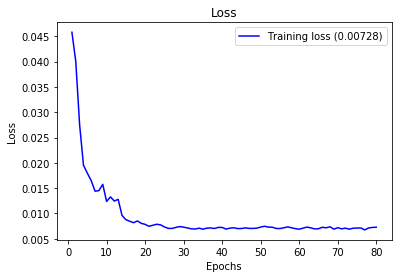

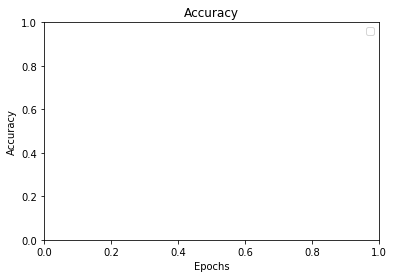

426500/426500 [==============================] - 82s 191us/step


In [0]:
from keras import Sequential, optimizers
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten,GRU, Bidirectional, LSTM
import scipy.io as sio
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import model_plot as pt

# this model is for washing mac
# read data from matlab
#------------train-------------
x='./train/input_x_washing.mat'
y='./train/input_y_washing.mat'
x_input=sio.loadmat(x)
y_input=sio.loadmat(y)
x_train = x_input.get('input_x_washing_99')
y_train = y_input.get('input_y_washing_199')
x_train = np.transpose(x_train)
x_train = x_train[:,:,np.newaxis]
y_train = np.transpose(y_train)


# model building
model = Sequential()
model.add(Conv1D(16, kernel_size=4, activation='relu', input_shape=(99,1), name='conv1'))
# Bi-directional GRUs
model.add(Bidirectional(GRU(64, activation='relu', return_sequences=True), merge_mode='concat'))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(128, activation='relu', return_sequences=False), merge_mode='concat'))
model.add(Dropout(0.5))

# Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# model setting
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.summary()


# random the dataset
index = [i for i in range(len(x_train))]
random.shuffle(index)
x_train = x_train[index]
y_train = y_train[index]
x_train = x_train[0:int(1*len(x_train)),:,:]
y_train = y_train[0:int(1*len(y_train)),:]


reduce_lr = ReduceLROnPlateau(monitor='loss', patience=3, mode='auto')


# model saving
hist=model.fit(x_train, y_train, epochs=80,batch_size=256, callbacks=[reduce_lr])
pt.plot_history(hist)


#learning rate fitting
reduce_lr = ReduceLROnPlateau(monitor='loss', patience=3, mode='auto')

# model saving
#pt.plot_history(hist)
#model.save('./model/RNN_model_washing.h5')
model = load_model('./model/RNN_model_washing.h5')

#valid set
x_input=sio.loadmat('input_x_test2.mat')
x_train = x_input.get('input_x_test2')
x_train = np.transpose(x_train)
x_train = x_train[0:int(1*len(x_train)),:,np.newaxis]
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)

#output save
sio.savemat('./newout/y_RNN_output_washing_test.mat', {'y1':y})

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 96, 16)            80        
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 96, 128)           31104     
_________________________________________________________________
dropout_16 (Dropout)         (None, 96, 128)           0         
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 256)               197376    
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
__________

W0823 00:41:17.252329 140151802767232 legend.py:1289] No handles with labels found to put in legend.


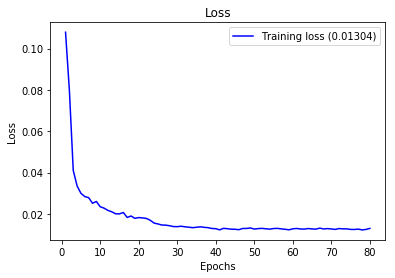

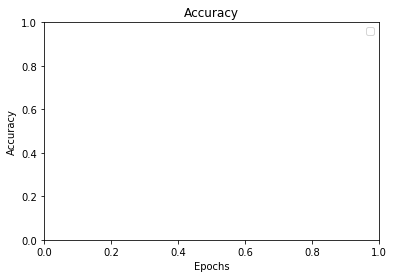

426500/426500 [==============================] - 75s 176us/step


In [0]:
from keras import Sequential, optimizers
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten,GRU, Bidirectional, LSTM
import scipy.io as sio
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import model_plot as pt


# this model os for dishwasher
# read data from matlab
#------------train-------------
x='./train/input_x_dishwasher.mat'
y='./train/input_y_dishwasher.mat'
x_input=sio.loadmat(x)
y_input=sio.loadmat(y)
x_train = x_input.get('input_x_dishwasher')
y_train = y_input.get('input_y_dishwasher')
x_train = np.transpose(x_train)
x_train = x_train[:,:,np.newaxis]
y_train = np.transpose(y_train)


# model building
model = Sequential()
model.add(Conv1D(16, kernel_size=4, activation='relu', input_shape=(99,1), name='conv1'))
# Bi-directional GRUs
model.add(Bidirectional(GRU(64, activation='relu', return_sequences=True), merge_mode='concat'))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(128, activation='relu', return_sequences=False), merge_mode='concat'))
model.add(Dropout(0.5))

# Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# model setting
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.summary()


# random the dataset
index = [i for i in range(len(x_train))]
random.shuffle(index)
x_train = x_train[index]
y_train = y_train[index]
x_train = x_train[0:int(1*len(x_train)),:,:]
y_train = y_train[0:int(1*len(y_train)),:]


reduce_lr = ReduceLROnPlateau(monitor='loss', patience=3, mode='auto')


# model saving
hist=model.fit(x_train, y_train, epochs=80,batch_size=256, callbacks=[reduce_lr])


#learning rate fitting
reduce_lr = ReduceLROnPlateau(monitor='loss', patience=3, mode='auto')

# model saving
pt.plot_history(hist)
model.save('./model/RNN_model_dishwasher.h5')
model = load_model('./model/RNN_model_dishwasher.h5')

#valid set
x_input=sio.loadmat('input_x_test2.mat')
x_train = x_input.get('input_x_test2')
x_train = np.transpose(x_train)
x_train = x_train[0:int(1*len(x_train)),:,np.newaxis]
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)

#output save
sio.savemat('./output/y_RNN_output_dishwasher.mat', {'y1':y})

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 96, 16)            80        
_________________________________________________________________
bidirectional_5 (Bidirection (None, 96, 128)           31104     
_________________________________________________________________
dropout_7 (Dropout)          (None, 96, 128)           0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 256)               197376    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
__________

W0816 21:14:02.410075 140256631289728 legend.py:1289] No handles with labels found to put in legend.


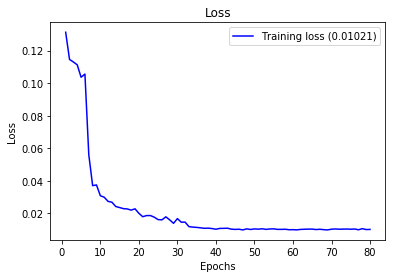

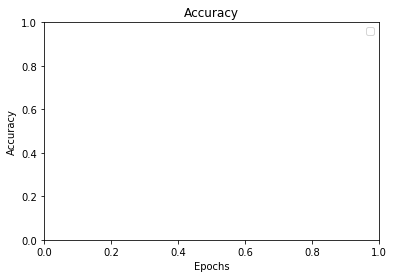

426500/426500 [==============================] - 80s 187us/step


In [0]:
from keras import Sequential, optimizers
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten,GRU, Bidirectional, LSTM
import scipy.io as sio
import numpy as np
import random
import matplotlib.pyplot as plt
import model_plot as pt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# this model os for microwave
# read data from matlab
#------------train-------------
x='./train/input_x_microwave_t.mat'
y='./train/input_y_microwave_t.mat'
x_input=sio.loadmat(x)
y_input=sio.loadmat(y)
x_train = x_input.get('input_x_microwave')
y_train = y_input.get('input_y_microwave')
x_train = np.transpose(x_train)
x_train = x_train[:,:,np.newaxis]
y_train = np.transpose(y_train)


# model building
model = Sequential()
model.add(Conv1D(16, kernel_size=4, activation='relu', input_shape=(99,1), name='conv1'))
# Bi-directional GRUs
model.add(Bidirectional(GRU(64, activation='relu', return_sequences=True), merge_mode='concat'))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(128, activation='relu', return_sequences=False), merge_mode='concat'))
model.add(Dropout(0.5))

# Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# model setting
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.summary()


# random the dataset
index = [i for i in range(len(x_train))]
random.shuffle(index)
x_train = x_train[index]
y_train = y_train[index]
x_train = x_train[0:int(1*len(x_train)),:,:]
y_train = y_train[0:int(1*len(y_train)),:]


reduce_lr = ReduceLROnPlateau(monitor='loss', patience=3, mode='auto')


# model saving
hist=model.fit(x_train, y_train, epochs=80,batch_size=256, callbacks=[reduce_lr])
pt.plot_history(hist)


#learning rate fitting


# model saving
#pt.plot_history(hist)
model.save('./model/RNN_model_microwave2.h5')
model = load_model('./model/RNN_model_microwave2.h5')

#valid set
x_input=sio.loadmat('input_x_test2.mat')
x_train = x_input.get('input_x_test2')
x_train = np.transpose(x_train)
x_train = x_train[0:int(1*len(x_train)),:,np.newaxis]
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)

#output save
sio.savemat('./output/y_RNN_output_microwave_Tt.mat', {'y1':y})

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 96, 16)            80        
_________________________________________________________________
bidirectional_21 (Bidirectio (None, 96, 128)           31104     
_________________________________________________________________
dropout_31 (Dropout)         (None, 96, 128)           0         
_________________________________________________________________
bidirectional_22 (Bidirectio (None, 256)               197376    
_________________________________________________________________
dropout_32 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_33 (Dropout)         (None, 128)               0         
__________

W0823 02:08:28.310004 140151802767232 legend.py:1289] No handles with labels found to put in legend.


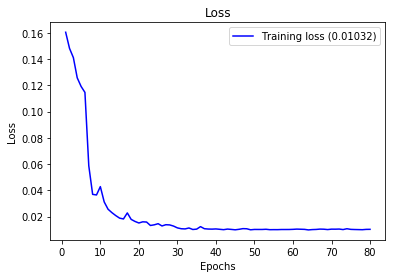

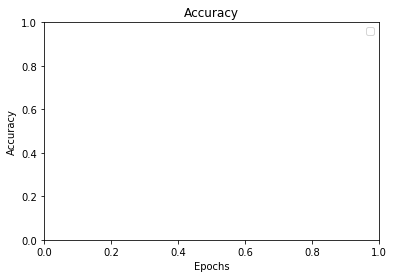

426500/426500 [==============================] - 76s 179us/step


In [0]:
from keras import Sequential, optimizers
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten,GRU, Bidirectional, LSTM
import scipy.io as sio
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import model_plot as pt

# this model os for kettle
# read data from matlab
#------------train-------------
x='./train/input_x_kettle.mat'
y='./train/input_y_kettle.mat'
x_input=sio.loadmat(x)
y_input=sio.loadmat(y)
x_train = x_input.get('input_x_kettle')
y_train = y_input.get('input_y_kettle')
x_train = np.transpose(x_train)
x_train = x_train[:,:,np.newaxis]
y_train = np.transpose(y_train)


# model building
model = Sequential()
model.add(Conv1D(16, kernel_size=4, activation='relu', input_shape=(99,1), name='conv1'))
# Bi-directional GRUs
model.add(Bidirectional(GRU(64, activation='relu', return_sequences=True), merge_mode='concat'))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(128, activation='relu', return_sequences=False), merge_mode='concat'))
model.add(Dropout(0.5))

# Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# model setting
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.summary()


# random the dataset
index = [i for i in range(len(x_train))]
random.shuffle(index)
x_train = x_train[index]
y_train = y_train[index]
x_train = x_train[0:int(1*len(x_train)),:,:]
y_train = y_train[0:int(1*len(y_train)),:]


reduce_lr = ReduceLROnPlateau(monitor='loss', patience=3, mode='auto')


# model saving
hist=model.fit(x_train, y_train, epochs=80,batch_size=256, callbacks=[reduce_lr])
pt.plot_history(hist)



model.save('./model/RNN_model_kettles.h5')
model = load_model('./model/RNN_model_kettles.h5')

#valid set
x_input=sio.loadmat('input_x_test2.mat')
x_train = x_input.get('input_x_test2')
x_train = np.transpose(x_train)
x_train = x_train[0:int(1*len(x_train)),:,np.newaxis]
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)

#output save
sio.savemat('./output/y_RNN_output_kettle_simoke.mat', {'y1':y})

W0822 19:31:11.781996 140652719150976 legend.py:1289] No handles with labels found to put in legend.


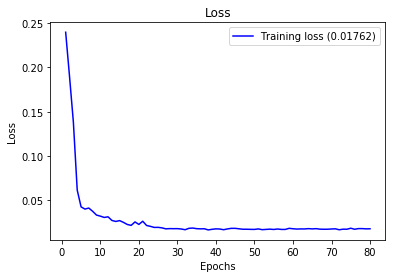

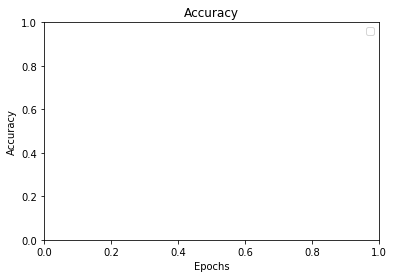

426500/426500 [==============================] - 84s 197us/step


In [0]:
import model_plot as pt
pt.plot_history(hist)

model.save('./model/RNN_model_kettles.h5')
model = load_model('./model/RNN_model_kettles.h5')

#valid set
x_input=sio.loadmat('input_x_test2.mat')
x_train = x_input.get('input_x_test2')
x_train = np.transpose(x_train)
x_train = x_train[0:int(1*len(x_train)),:,np.newaxis]
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)

#output save
sio.savemat('./output/y_RNN_output_kettle_simoke.mat', {'y1':y})

In [0]:
from keras import Sequential, optimizers
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten,GRU, Bidirectional, LSTM
import scipy.io as sio
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

#test set
x_input=sio.loadmat('input_x_test2.mat')
x_train = x_input.get('input_x_test2')
x_train = np.transpose(x_train)
x_train = x_train[0:int(1*len(x_train)),:,np.newaxis]

#kettle
model = load_model('./model/RNN_model_kettle.h5')
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)
#output save
sio.savemat('./newout/y_RNN_output_kettle.mat', {'y1':y})

#microwave
model = load_model('./model/RNN_model_microwave.h5')
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)
#output save
sio.savemat('./newout/y_RNN_output_microwave.mat', {'y1':y})

#dishwash
model = load_model('./model/RNN_model_dishwasher.h5')
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)
#output save
sio.savemat('./newout/y_RNN_output_dishwasher.mat', {'y1':y})

#washing mac
model = load_model('./model/RNN_model_washing.h5')
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)
#output save
sio.savemat('./newout/y_RNN_output_washing.mat', {'y1':y})

#fridge
model = load_model('./model/RNN_model_fridge.h5')
y=model.predict(x_train, batch_size=1024, verbose=1, steps=None)
#output save
sio.savemat('./newout/y_RNN_output_fridge.mat', {'y1':y})

Using TensorFlow backend.
W0801 23:02:32.218504 140643361666944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0801 23:02:32.261573 140643361666944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0801 23:02:32.298566 140643361666944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0801 23:02:32.811414 140643361666944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instea

426500/426500 [==============================] - 112s 262us/step
